## 1 : Chargement des données et vérification des types

In [5]:
import pandas as pd
import numpy as np

DATA_PATH = "../data/clients_microfinance.csv"

# Génération des données
from faker import Faker
fake = Faker('fr_FR')
np.random.seed(42)

n = 2000
data = {
    'client_id': np.arange(1, n+1),
    'sexe': np.random.choice(['M', 'F'], n, p=[0.55, 0.45]),
    'age': np.random.randint(18, 70, n),
    'situation_familiale': np.random.choice(['Célibataire', 'Marié(e)', 'Veuf/veuve', 'Divorcé(e)'], n, p=[0.3, 0.5, 0.1, 0.1]),
    'nombre_enfants': np.random.poisson(1.2, n),
    'niveau_etude': np.random.choice(['Aucun', 'Primaire', 'Secondaire', 'Supérieur'], n, p=[0.25, 0.35, 0.3, 0.1]),
    'secteur_activite': np.random.choice(['Agriculture', 'Commerce', 'Artisanat', 'Services'], n, p=[0.4, 0.3, 0.2, 0.1]),
    'revenu_mensuel': np.abs(np.random.normal(180000, 60000, n)).astype(int),
    'montant_pret': np.random.uniform(50000, 600000, n).astype(int),
    'duree_pret': np.random.choice([6, 12, 18, 24], n, p=[0.2, 0.4, 0.3, 0.1]),
    'taux_interet': np.random.uniform(4.5, 18.0, n).round(1),
    'but_du_pret': np.random.choice(['Achat équipement', 'Capital démarrage', 'Stock', 'Urgence'], n),
    'historique_defaut': np.random.choice(['Oui', 'Non'], n, p=[0.25, 0.75]),
    'remboursement_pret_prec': np.random.choice(['Oui', 'Non', 'Aucun'], n, p=[0.6, 0.1, 0.3]),
    'score_credit': np.clip(np.random.normal(65, 15, n), 30, 95).astype(int),
    'zone_residentielle': np.random.choice(['Urbaine', 'Rurale'], n, p=[0.4, 0.6]),
    'contact_telephone': np.random.choice(['Oui', 'Non'], n, p=[0.8, 0.2]),
    'co_emprunteur': np.random.choice(['Oui', 'Non'], n, p=[0.35, 0.65])
}

# Création de la variable cible
df = pd.DataFrame(data)
df['delai_remboursement'] = np.where(
    (df['score_credit'] < 50) | 
    (df['historique_defaut'] == 'Oui') |
    (df['revenu_mensuel'] < 0.15 * df['montant_pret']),
    'Non', 'Oui'
)

# Sauvegarde dans le dossier data
df.to_csv(DATA_PATH, index=False)
print(f"✅ Données générées et sauvegardées dans {DATA_PATH}")

# Affichage des premières lignes
df.head()

✅ Données générées et sauvegardées dans ../data/clients_microfinance.csv


,client_id,sexe,age,situation_familiale,nombre_enfants,niveau_etude,secteur_activite,revenu_mensuel,montant_pret,duree_pret,taux_interet,but_du_pret,historique_defaut,remboursement_pret_prec,score_credit,zone_residentielle,contact_telephone,co_emprunteur,delai_remboursement
0,1,M,45,Marié(e),1,Aucun,Agriculture,80894,200854,6,4.8,Urgence,Non,Oui,67,Rurale,Non,Non,Oui
1,2,F,24,Veuf/veuve,2,Primaire,Commerce,195540,594470,18,11.0,Achat équipement,Non,Oui,76,Rurale,Oui,Non,Oui
2,3,F,52,Marié(e),2,Primaire,Services,187202,422167,24,7.5,Stock,Oui,Aucun,54,Rurale,Oui,Oui,Non
3,4,F,45,Marié(e),1,Primaire,Agriculture,167407,545470,12,10.1,Stock,Non,Oui,54,Rurale,Oui,Oui,Oui
4,5,M,31,Marié(e),2,Primaire,Agriculture,208975,476175,18,16.1,Capital démarrage,Oui,Aucun,42,Urbaine,Oui,Non,Non


## 2 : Gestion des valeurs manquantes

In [6]:
print("Valeurs manquantes par colonne :")
print(df.isnull().sum())

# Remplissage des valeurs manquantes
df['score_credit'] = df['score_credit'].fillna(df['score_credit'].median())

Valeurs manquantes par colonne :
client_id                  0
sexe                       0
age                        0
situation_familiale        0
nombre_enfants             0
niveau_etude               0
secteur_activite           0
revenu_mensuel             0
montant_pret               0
duree_pret                 0
taux_interet               0
but_du_pret                0
historique_defaut          0
remboursement_pret_prec    0
score_credit               0
zone_residentielle         0
contact_telephone          0
co_emprunteur              0
delai_remboursement        0
dtype: int64


## 3 : Encodage des variables catégorielles

In [7]:
le = LabelEncoder()
binary_cols = ['sexe', 'historique_defaut', 'delai_remboursement']
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

df = pd.get_dummies(df, columns=['secteur_activite', 'niveau_etude'])

## 4 : Visualisations des distributions

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)
colors = ['#2ecc71', '#3498db']  # Palette verte/bleue

### Variables Numériques

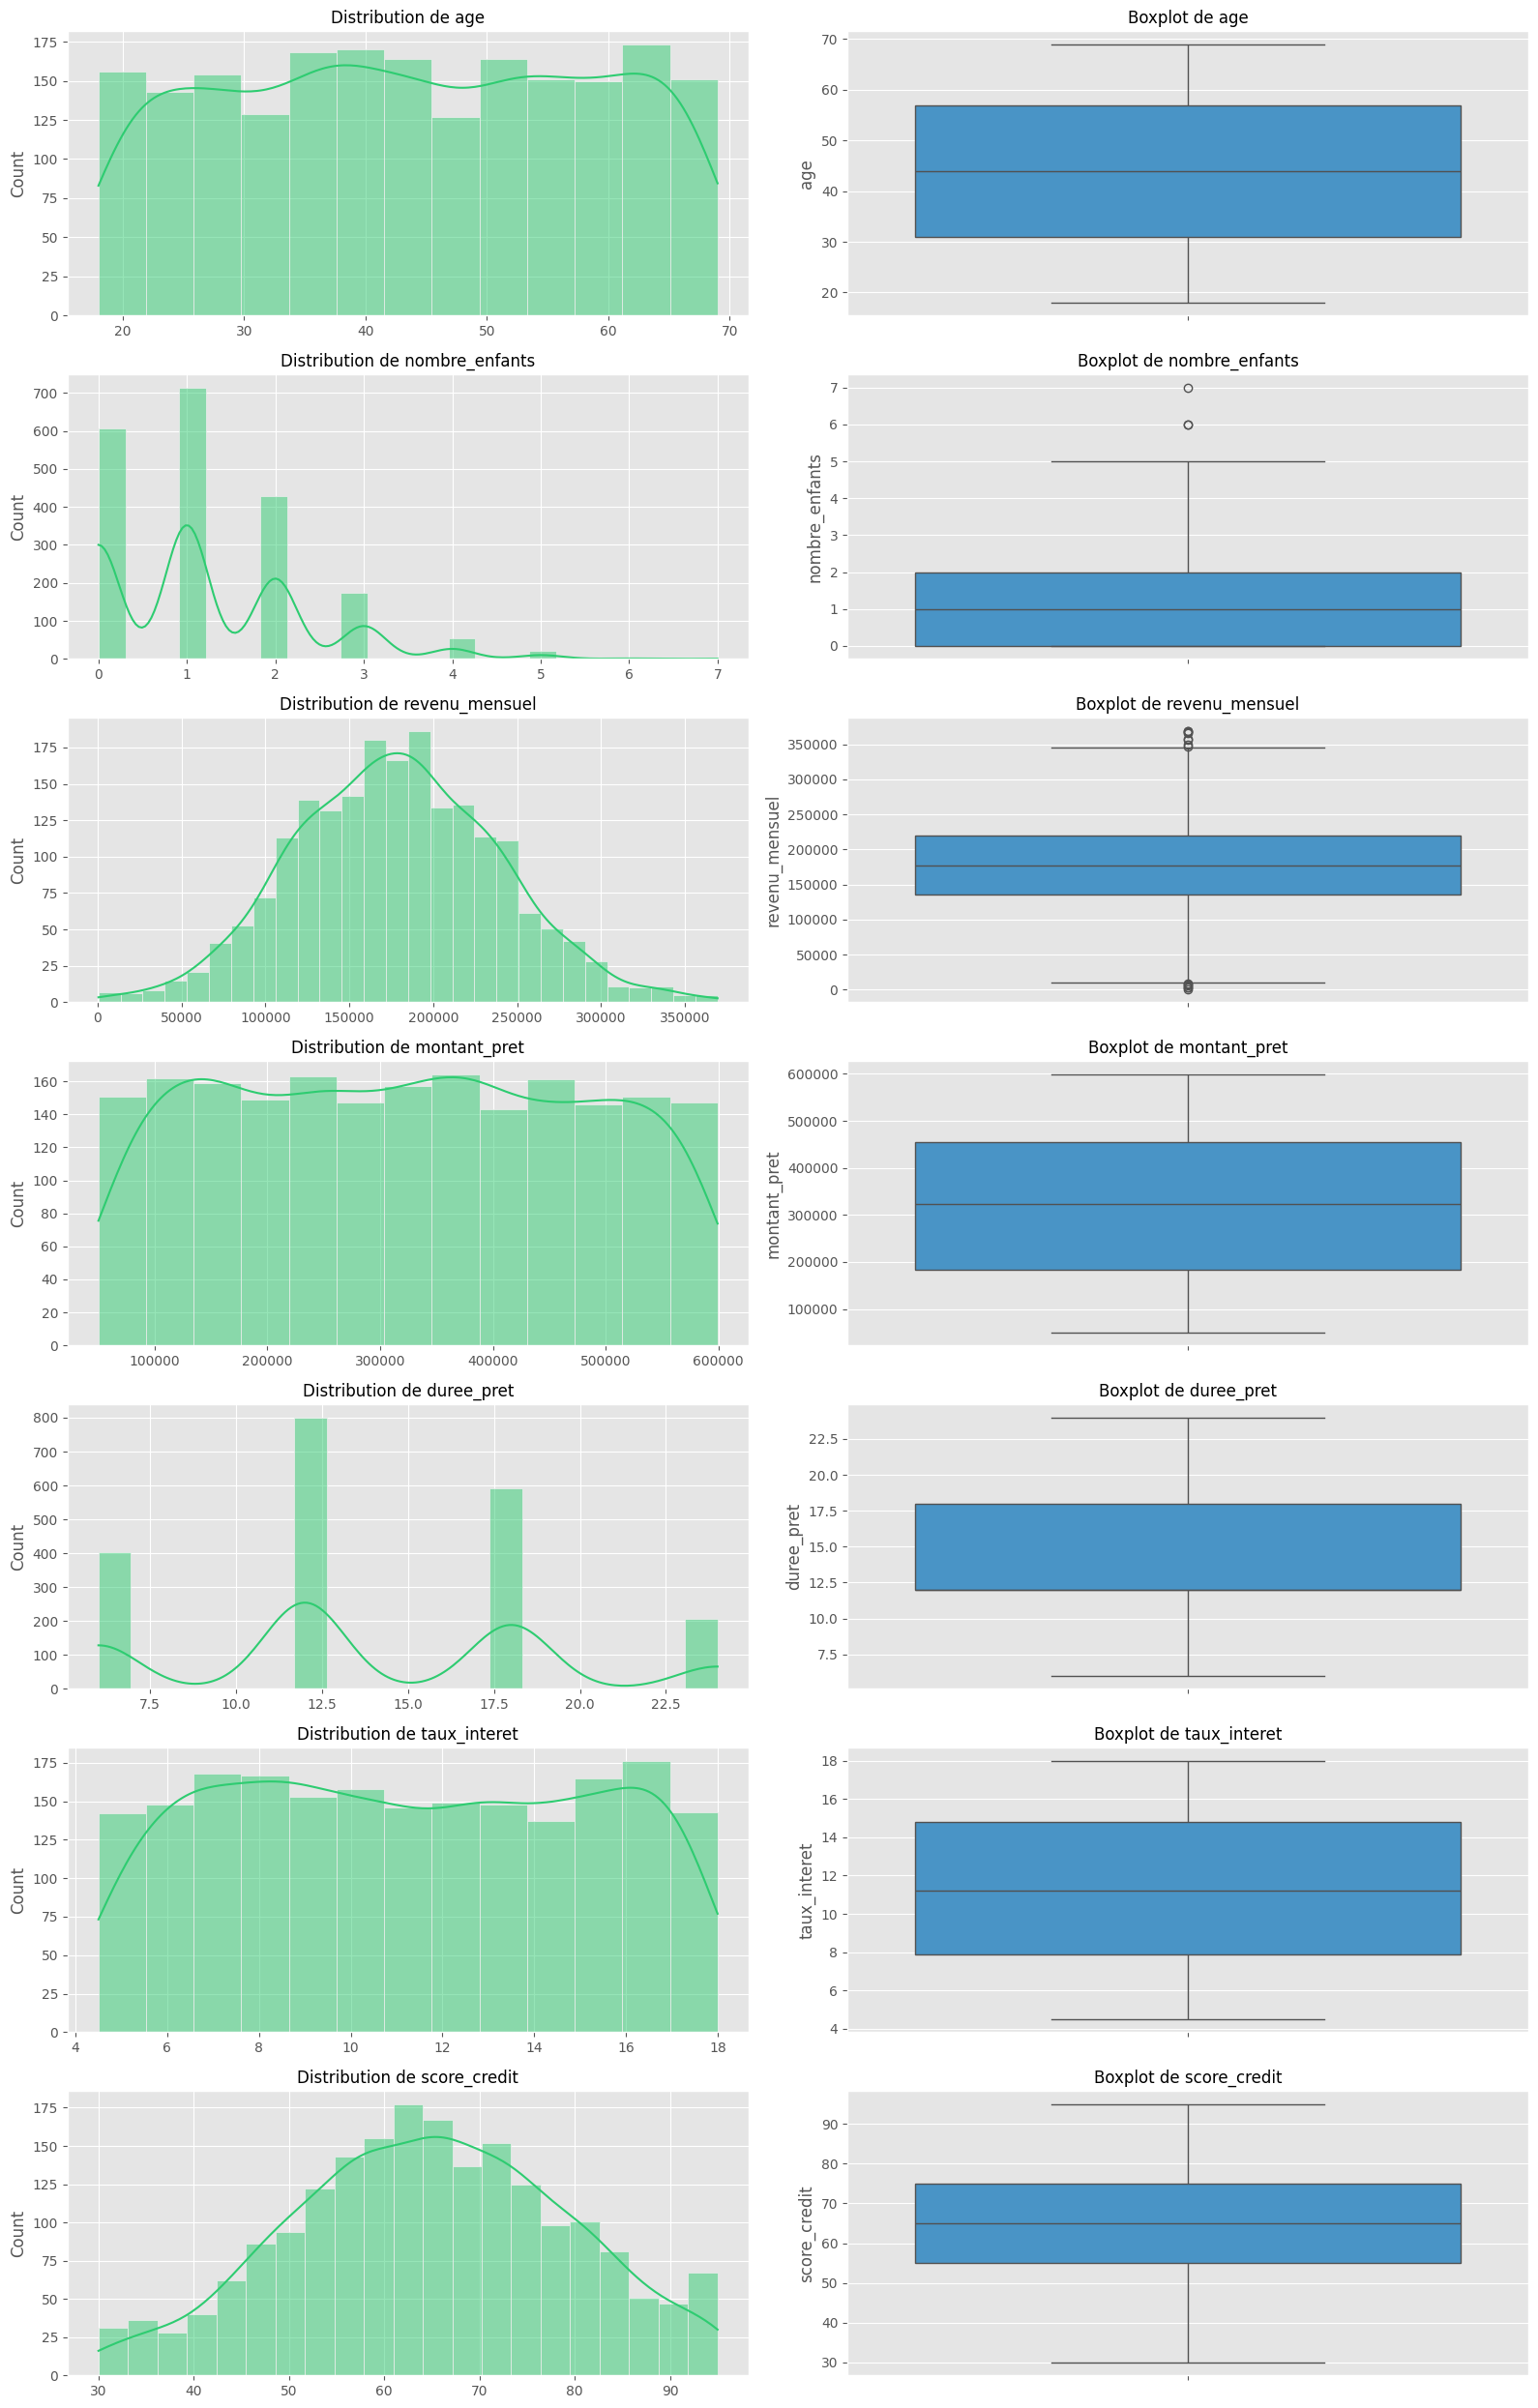

In [27]:
num_vars = ['age', 'nombre_enfants', 'revenu_mensuel', 
           'montant_pret', 'duree_pret', 'taux_interet', 'score_credit']

fig, axes = plt.subplots(nrows=len(num_vars), ncols=2, figsize=(16, 25))

for idx, var in enumerate(num_vars):
    # Histogramme + KDE
    sns.histplot(df[var], kde=True, ax=axes[idx, 0], color=colors[0])
    axes[idx, 0].set_title(f'Distribution de {var}', fontsize=12)
    axes[idx, 0].set_xlabel('')
    
    # Boxplot
    sns.boxplot(y=df[var], ax=axes[idx, 1], color=colors[1])
    axes[idx, 1].set_title(f'Boxplot de {var}', fontsize=12)
    
plt.tight_layout()
plt.show()

### Variables Catégorielles

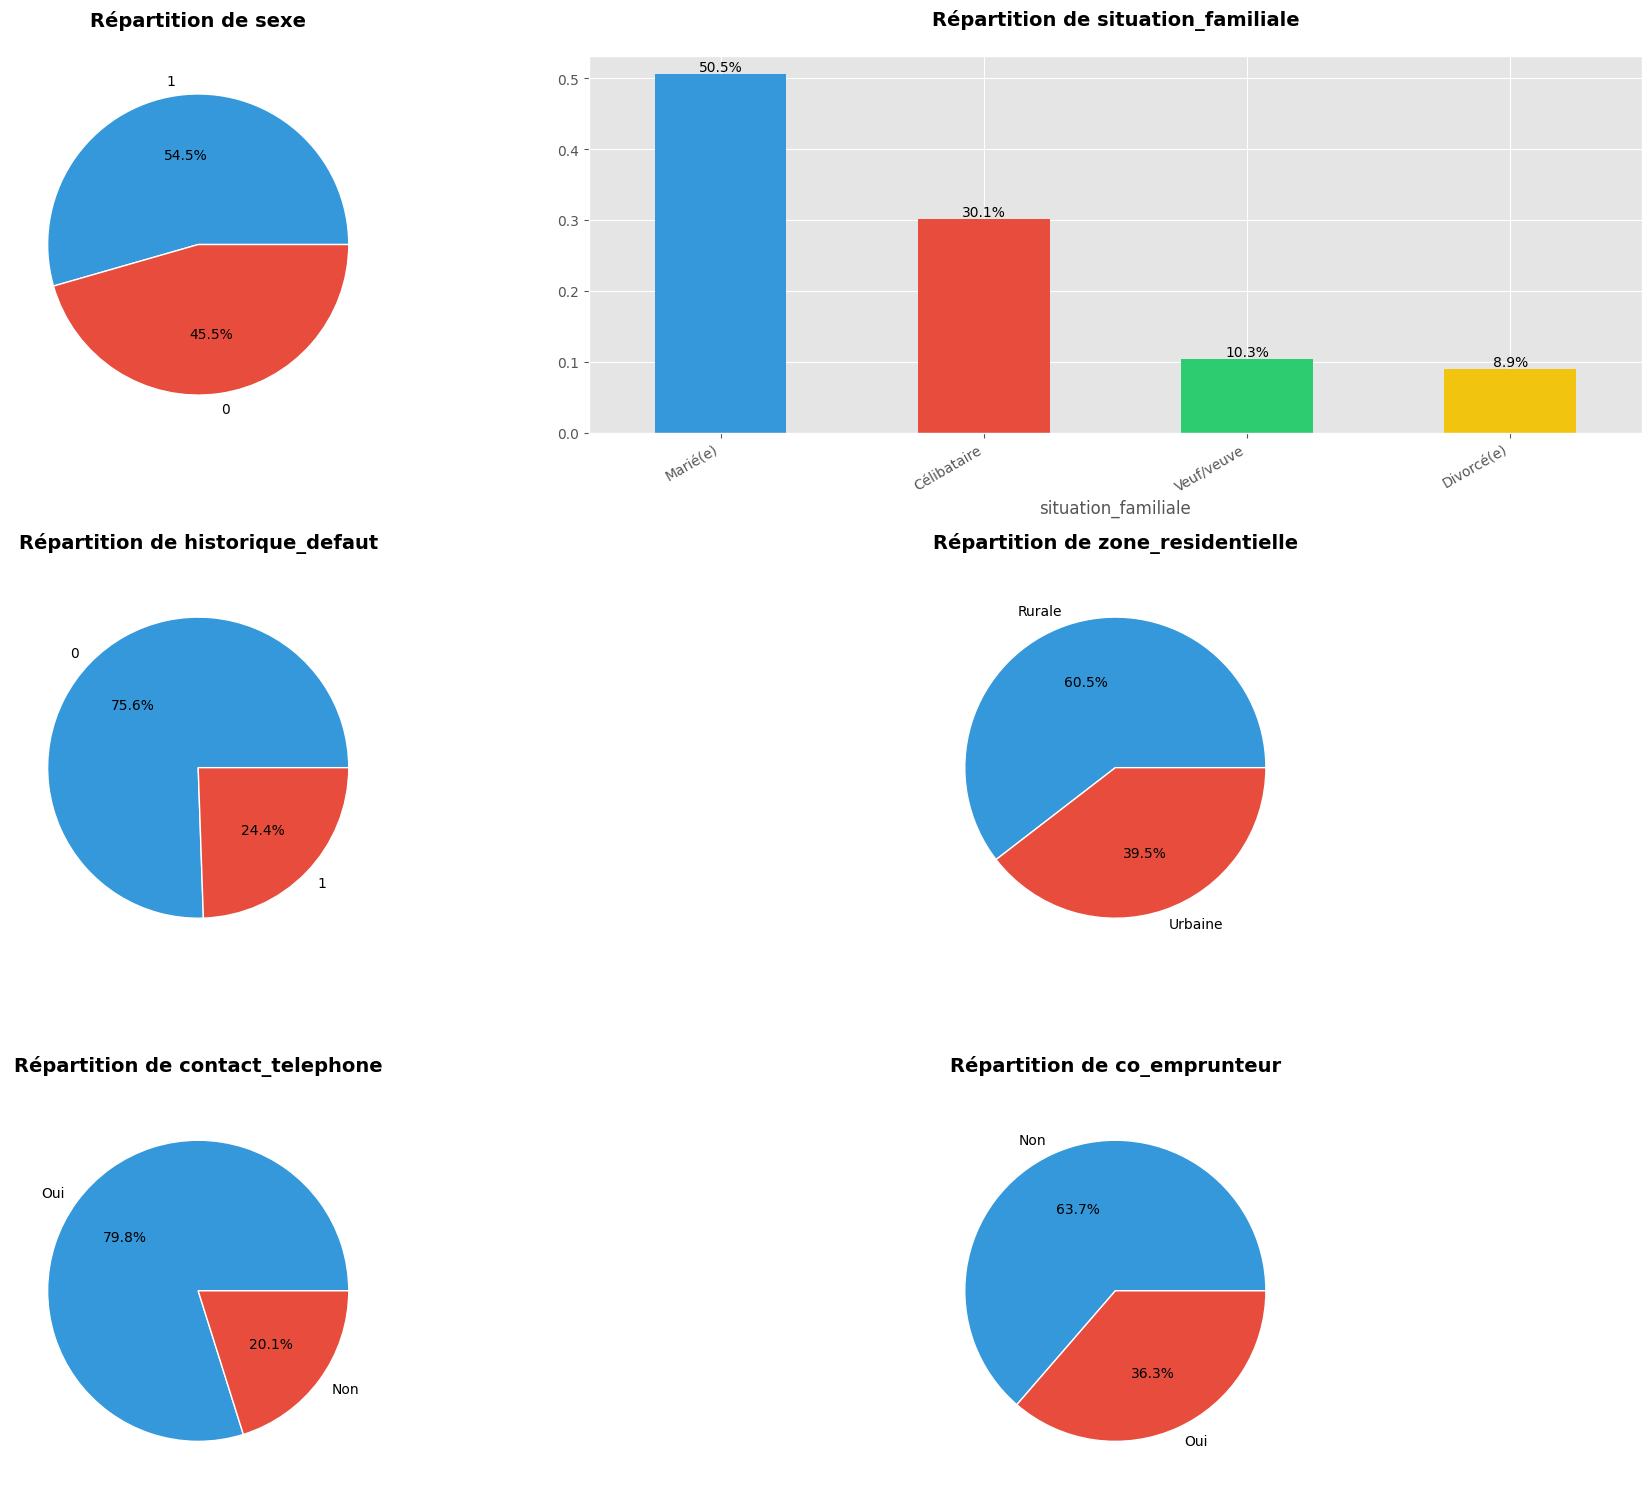

In [29]:
# Liste des variables catégorielles non encodées
cat_vars = [
    'sexe', 
    'situation_familiale',
    'historique_defaut',
    'zone_residentielle',
    'contact_telephone',
    'co_emprunteur'
]

# Configuration du plot
fig = plt.figure(figsize=(20, 15))
gs = fig.add_gridspec(3, 2)  # Adapté au nouveau nombre de variables

# Palette de couleurs
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f1c40f']

for idx, var in enumerate(cat_vars):
    try:
        ax = fig.add_subplot(gs[idx])
        counts = df[var].value_counts(normalize=True)
        
        # Choix du type de graphique
        if len(counts) > 2:
            # Barplot avec annotations
            bars = counts.plot(kind='bar', color=colors, ax=ax)
            ax.set_xticklabels(counts.index, rotation=30, ha='right')
            
            # Ajout des pourcentages
            for p in bars.patches:
                ax.annotate(f'{p.get_height():.1%}', 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha='center', va='center', 
                           xytext=(0, 5), 
                           textcoords='offset points')
        else:
            # Pie chart simplifié
            counts.plot(kind='pie', autopct='%1.1f%%', 
                       colors=colors[:len(counts)], 
                       wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
                       ax=ax)
        
        ax.set_title(f'Répartition de {var}\n', fontsize=14, fontweight='bold')
        ax.set_ylabel('')
        
    except KeyError as e:
        print(f"⚠️ Variable non trouvée : {e}. Vérifier l'encodage préalable.")
        continue

plt.tight_layout()
plt.show()

### Analyse des variables encodées

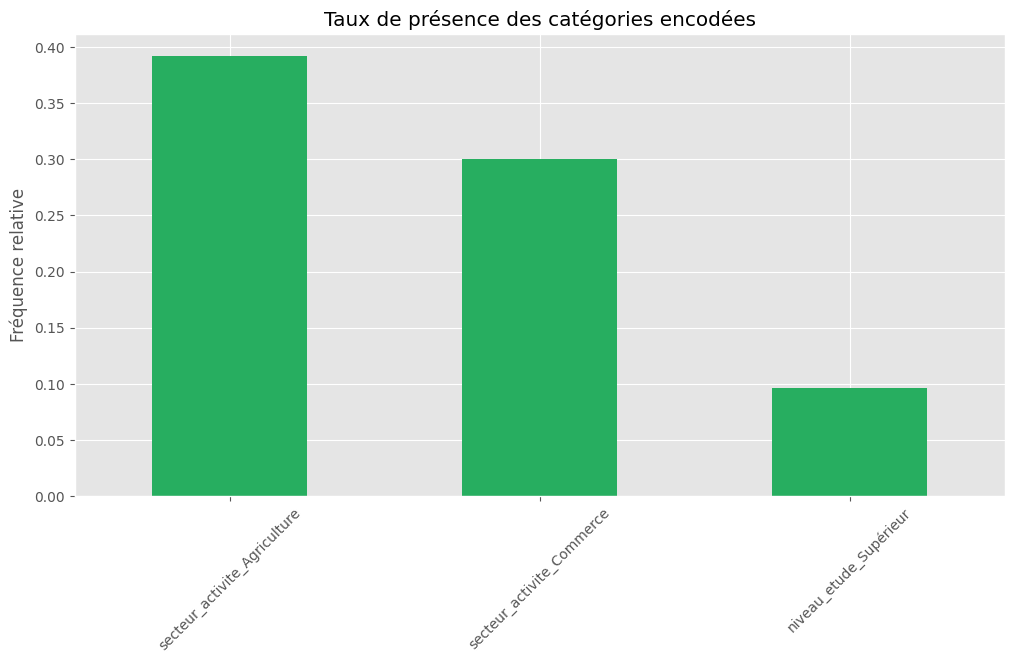

In [30]:
encoded_vars = [
    'secteur_activite_Agriculture',
    'secteur_activite_Commerce',
    'niveau_etude_Supérieur'
]

plt.figure(figsize=(12, 6))
df[encoded_vars].mean().plot(kind='bar', color='#27ae60')
plt.title('Taux de présence des catégories encodées')
plt.xticks(rotation=45)
plt.ylabel('Fréquence relative')
plt.show()

## 5 : Détection des outliers

Bornes de détection :


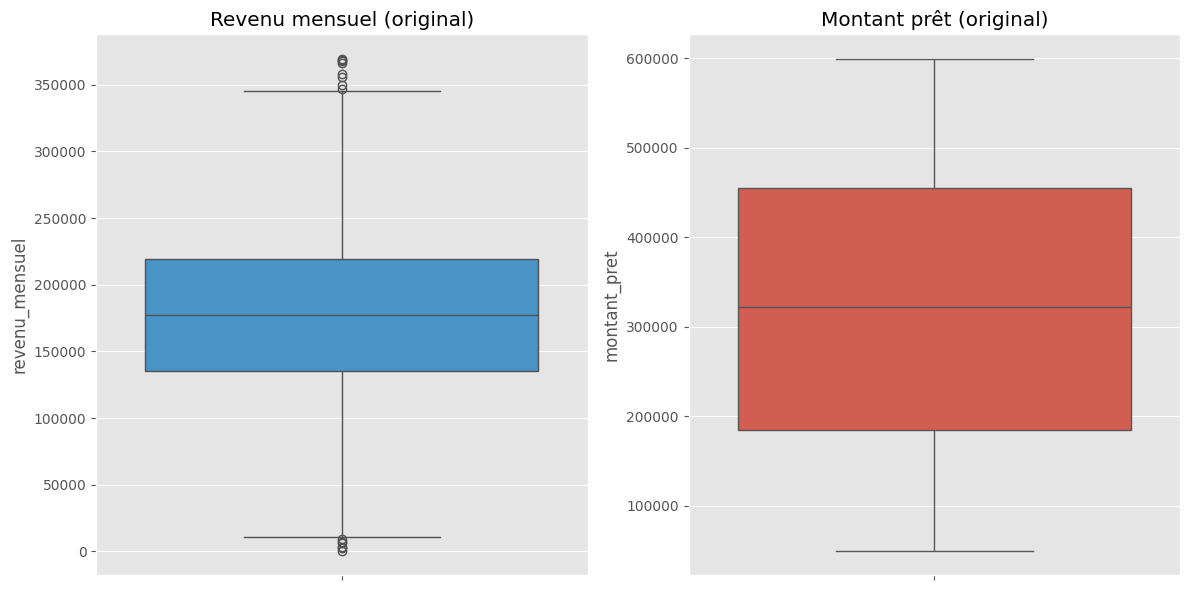

In [32]:
# Configuration des variables et paramètres
outlier_vars = ['revenu_mensuel', 'montant_pret']
factor = 1.5  # Seuil standard pour détection modérée

# Calcul des bornes pour chaque variable
Q1 = df[outlier_vars].quantile(0.25)
Q3 = df[outlier_vars].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - factor * IQR
upper_bound = Q3 + factor * IQR

# Affichage des limites calculées
print("Bornes de détection :")
pd.DataFrame({
    'Variable': outlier_vars,
    'Lower Bound': lower_bound.values,
    'Upper Bound': upper_bound.values
}).style.format("{:,.0f}")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['revenu_mensuel'], color='#3498db')
plt.title('Revenu mensuel (original)')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['montant_pret'], color='#e74c3c')
plt.title('Montant prêt (original)')

plt.tight_layout()
plt.show()

## 6 : Profils à risque

In [33]:
risky = df[df['delai_remboursement'] == 0]
print("Caractéristiques moyennes des clients à risque :")
print(risky[['age', 'revenu_mensuel', 'score_credit']].mean())

Caractéristiques moyennes des clients à risque :
age                   44.062005
revenu_mensuel    171641.843008
score_credit          57.625330
dtype: float64


## 7 : Corrélations

<Axes: >

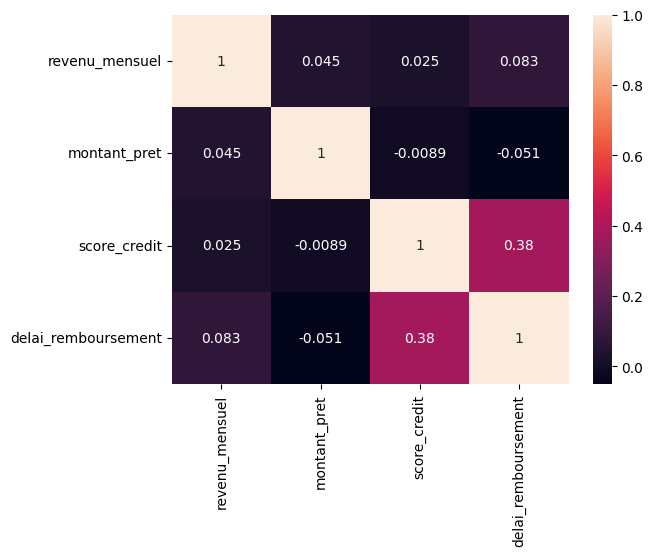

In [12]:
import seaborn as sns 

corr_matrix = df[['revenu_mensuel', 'montant_pret', 'score_credit', 'delai_remboursement']].corr()
sns.heatmap(corr_matrix, annot=True)

## 8 : Défauts par secteur

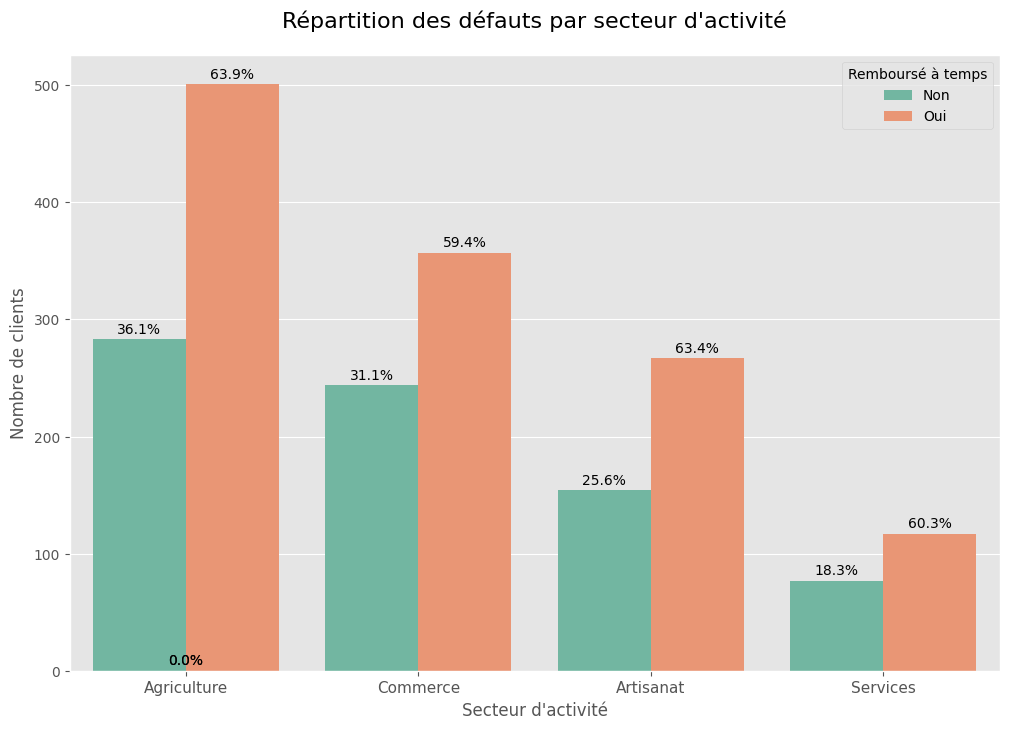

In [34]:
df['secteur'] = df.filter(like='secteur_activite_').idxmax(axis=1).str.replace('secteur_activite_', '')

# Création du countplot multi-secteurs
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='secteur', 
                 hue='delai_remboursement', 
                 data=df,
                 order=df['secteur'].value_counts().index,
                 palette='Set2')

# Personnalisation avancée
plt.title('Répartition des défauts par secteur d\'activité', fontsize=16, pad=20)
plt.xlabel('Secteur d\'activité', fontsize=12)
plt.ylabel('Nombre de clients', fontsize=12)
plt.xticks(fontsize=11)

# Ajout des pourcentages
total_counts = df['secteur'].value_counts().values
for p in ax.patches:
    height = p.get_height()
    sector_idx = int(p.get_x() + p.get_width()/2)
    sector_total = total_counts[sector_idx]
    
    ax.text(p.get_x() + p.get_width()/2., height + 5, 
           f'{height/sector_total:.1%}', 
           ha='center', fontsize=10)

plt.legend(title='Remboursé à temps', labels=['Non', 'Oui'])
plt.show()

## 9 : Remboursement par genre

<Axes: xlabel='sexe'>

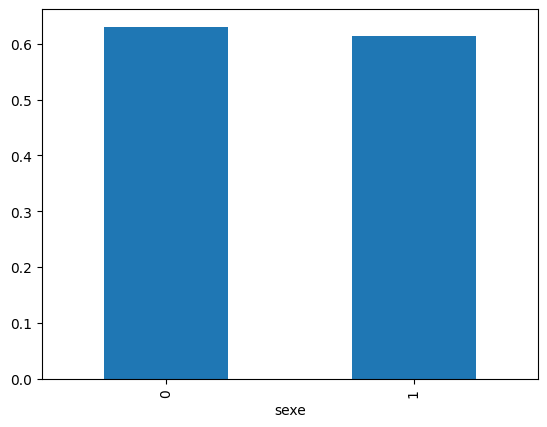

In [14]:
df.groupby('sexe')['delai_remboursement'].mean().plot.bar()

## 10 : Zone résidentielle

In [15]:
pd.crosstab(df['zone_residentielle_Urbaine'], df['delai_remboursement'], normalize='index').plot.bar()

KeyError: 'zone_residentielle_Urbaine'

## 11 : Régression logistique

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df.drop('delai_remboursement', axis=1)
y = df['delai_remboursement']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = LogisticRegression()
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'Marié(e)'

## 12 : Comparaison de modèles

In [17]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

rf = RandomForestClassifier().fit(X_train, y_train)
xgb = XGBClassifier().fit(X_train, y_train)

ValueError: could not convert string to float: 'Marié(e)'

## 13 : Métriques de performance

In [18]:
from sklearn.metrics import classification_report

print("Régression Logistique :")
print(classification_report(y_test, model.predict(X_test)))

Régression Logistique :


ValueError: could not convert string to float: 'Divorcé(e)'

## 14 : Importance des features

In [19]:
pd.Series(rf.feature_importances_, index=X.columns).nlargest(5).plot.barh()

NameError: name 'rf' is not defined

## 15 : Validation croisée

In [20]:
from sklearn.model_selection import cross_val_score
cross_val_score(rf, X, y, cv=5).mean()

NameError: name 'rf' is not defined

## 16 : Clustering K-Means

In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3).fit(df[['revenu_mensuel', 'montant_pret']])

## 17 : Visualisation des clusters

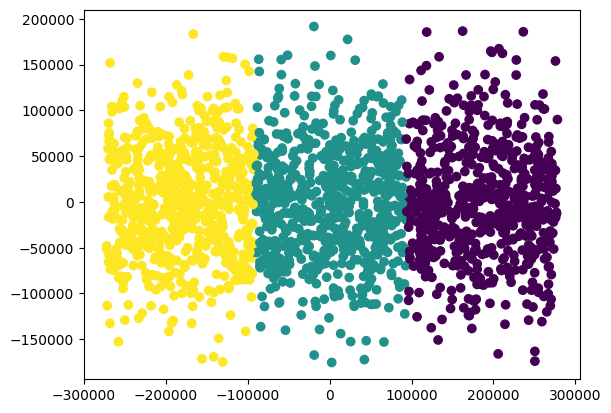

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(df[['revenu_mensuel', 'montant_pret']])
plt.scatter(components[:,0], components[:,1], c=kmeans.labels_)

## 18 : Classification par score

In [23]:
df['score_category'] = np.where(df['score_credit'] > 60, 'Bon', 'Risque')
df['score_category'].value_counts()

score_category
Bon       1203
Risque     797
Name: count, dtype: int64

## 19 : Fonction de prédiction

In [24]:
def predict_risk(client_data):
    client_df = pd.DataFrame([client_data])
    client_processed = preprocessor.transform(client_df)
    return rf.predict_proba(client_processed)[0][1]

## 20 : Recommandations

In [25]:
print("""
1. Prioriser les clients avec score > 65 et revenu > 200k FCFA
2. Limiter les prêts > 400k dans le secteur agricole
3. Offrir des taux préférentiels aux femmes
4. Imposer un co-emprunteur en zone rurale
""")


1. Prioriser les clients avec score > 65 et revenu > 200k FCFA
2. Limiter les prêts > 400k dans le secteur agricole
3. Offrir des taux préférentiels aux femmes
4. Imposer un co-emprunteur en zone rurale

